# Cleaning the records

In this Jupyter Notebook, we will execute a exploratory analysis.

Instructions: To run this notebook is required to have a the data/gen/merged.csv file. Generate it using the merge.ipynb


In [353]:
# Importing the libraries
import pandas as pd
import seaborn as sns  # Para visualización de datos mas avanzada
%matplotlib inline
import matplotlib.pyplot as plt # Para visualización de datos

In [354]:
# Constants for the resources
DATA_FILE = 'data/gen/merged.csv'

In [355]:
# Importing the dataset
df = pd.read_csv(DATA_FILE)
df.head()

C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\947250292.py:2: DtypeWarning: Columns (3,6,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_FILE)


,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,AGR_OCUP,AGR_DEDICA,AGRESORES_OTROS_TOTAL,AGR_OTROS_HOM,AGR_OTRAS_MUJ,AGR_OTROS_N_OS,AGR_OTRAS_N_AS,INST_DENUN_HECHO,MEDIDAS_SEGURIDAD,LEY_APLICABLE
0,2013.0,Enero,22.0,Guatemala,Víctima,Mujeres,38,02,01,01,...,Ocupaciones ignoradas,NaN,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Organismo Judicial,Medidas otorgadas,Ambas leyes (VIF y VCM)
1,2013.0,Enero,24.0,Guatemala,Víctima,Mujeres,20,01,Ninguna,01,...,Trabajadores ambulantes de servicios y afines,NaN,Ignorado,99.0,99.0,99.0,99.0,Ministerio Público,NaN,NaN
2,2013.0,Enero,21.0,Guatemala,Víctima,Mujeres,21,02,01,01,...,Albañiles,NaN,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN
3,2013.0,Enero,2.0,Guatemala,Víctima,Hombres,70,Ninguna,Ninguna,Ninguna,...,NaN,Quehaceres del Hogar,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN
4,2013.0,Enero,10.0,Guatemala,Víctima,Mujeres,36,Ignorado,Ignorado,Ignorado,...,Ocupaciones no especificadas en las anteriores,NaN,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN


Nota: Vemos que tenemos columnas con tipos de datos irregulares. Columnas (3,6,26,28,29)


## Conversión de datos

### Hace la columna VIC_EDAD de tipo numérico

In [356]:
df['VIC_EDAD'] = pd.to_numeric(df['VIC_EDAD'], errors='coerce')
df['VIC_EDAD'] = df['VIC_EDAD'].fillna(98)

### Hace la columna AGR_EDAD de tipo numérico

In [357]:
df['AGR_EDAD'] = pd.to_numeric(df['AGR_EDAD'], errors='coerce')
df['AGR_EDAD'] = df['AGR_EDAD'].fillna(98)

### Hacer la columna HEC_DIA de tipo numérico

In [358]:
df['HEC_DIA'] = pd.to_numeric(df['HEC_DIA'], errors='coerce')
df['HEC_DIA'] = df['HEC_DIA'].fillna(99)

## Estandarizar datos

### VIC_ALFAB y AGR_ALFAB

In [359]:
df['VIC_ALFAB'].replace('Si', 'Alfabeta', inplace=True)
df['VIC_ALFAB'].replace('No', 'Analfabeta', inplace=True)
df['AGR_ALFAB'].replace('Si', 'Alfabeta', inplace=True)
df['AGR_ALFAB'].replace('No', 'Analfabeta', inplace=True)

C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\3159170051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VIC_ALFAB'].replace('Si', 'Alfabeta', inplace=True)
C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\3159170051.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



### VIC_ESCOLARIDAD y AGR_ESCOLARIDAD

In [360]:
df['VIC_ESCOLARIDAD'].replace('Ninguna', 10)
df['VIC_ESCOLARIDAD'].replace('Ignorado', 99)
df['VIC_ESCOLARIDAD'] = pd.to_numeric(df['VIC_ESCOLARIDAD'], errors='coerce')
df['VIC_ESCOLARIDAD'] = df['VIC_ESCOLARIDAD'].fillna(99)

df['AGR_ESCOLARIDAD'].replace('Ninguna', 10)
df['AGR_ESCOLARIDAD'].replace('Ignorado', 99)
df['AGR_ESCOLARIDAD'] = pd.to_numeric(df['AGR_ESCOLARIDAD'], errors='coerce')
df['AGR_ESCOLARIDAD'] = df['VIC_ESCOLARIDAD'].fillna(99)

### VIC_TRABAJA y AGR_TRABAJA

In [361]:
df['VIC_TRABAJA'].replace('Si', 'Si trabaja por un salario o ingreso', inplace=True)
df['VIC_TRABAJA'].replace('No', 'No trabaja por un salario o ingreso', inplace=True)

df['AGR_TRABAJA'].replace('Si', 'Si trabaja por un salario o ingreso', inplace=True)
df['AGR_TRABAJA'].replace('No', 'No trabaja por un salario o ingreso', inplace=True)

C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\1501469265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VIC_TRABAJA'].replace('Si', 'Si trabaja por un salario o ingreso', inplace=True)
C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\1501469265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

### HEC_ANO

In [362]:
df['HEC_ANO'].replace('Ignorado', 9999)
df['HEC_ANO'] = pd.to_numeric(df['HEC_ANO'], errors='coerce')

### AGRESORES_OTROS_TOTAL

In [363]:
df['AGRESORES_OTROS_TOTAL'].replace('Ignorado', 99, inplace=True)
df['AGRESORES_OTROS_TOTAL'].replace('Ninguna', 0, inplace=True)
df['AGRESORES_OTROS_TOTAL'] = pd.to_numeric(df['AGRESORES_OTROS_TOTAL'], errors='coerce')

C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\2534257253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AGRESORES_OTROS_TOTAL'].replace('Ignorado', 99, inplace=True)
C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\2534257253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

### AGR_OTROS_HOM y AGR_OTRAS_MUJ y AGR_OTROS_N_OS y AGR_OTRAS_N_AS

In [364]:
df['AGR_OTROS_HOM'].replace('Ninguna', 0, inplace=True)
df['AGR_OTROS_HOM'] = pd.to_numeric(df['AGR_OTROS_HOM'], errors='coerce')

df['AGR_OTRAS_MUJ'].replace('Ninguna', 0, inplace=True)
df['AGR_OTRAS_MUJ'] = pd.to_numeric(df['AGR_OTRAS_MUJ'], errors='coerce')

df['AGR_OTROS_N_OS'].replace('Ninguna', 0, inplace=True)
df['AGR_OTROS_N_OS'] = pd.to_numeric(df['AGR_OTROS_N_OS'], errors='coerce')

df['AGR_OTRAS_N_AS'].replace('Ninguna', 0, inplace=True)
df['AGR_OTRAS_N_AS'] = pd.to_numeric(df['AGR_OTRAS_N_AS'], errors='coerce')

C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\6334424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AGR_OTROS_HOM'].replace('Ninguna', 0, inplace=True)
C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\6334424.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

### LEY_APLICABLE

In [365]:
df['LEY_APLICABLE'].replace('IGNORADO', 'Ignorado', inplace=True)
df['LEY_APLICABLE'].replace('AMBAS', 'AMBAS_LEYES_VIF/VCM', inplace=True)

C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\2919043749.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LEY_APLICABLE'].replace('IGNORADO', 'Ignorado', inplace=True)
C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\2919043749.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

### MEDIDAS_SEGURIDAD

In [366]:
df['MEDIDAS_SEGURIDAD'].replace('Si', 'Medidas otorgadas', inplace=True)
df['MEDIDAS_SEGURIDAD'].replace('No', 'Medidas no otorgadas', inplace=True)

C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\4126160939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MEDIDAS_SEGURIDAD'].replace('Si', 'Medidas otorgadas', inplace=True)
C:\Users\ealva\AppData\Local\Temp\ipykernel_27524\4126160939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

## Análisis básico manual


In [367]:
df.shape

(327781, 52)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327781 entries, 0 to 327780
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO_EMISION            327781 non-null  float64
 1   MES_EMISION            327781 non-null  object 
 2   DIA_EMISION            327781 non-null  float64
 3   DEPTO_MCPIO            327781 non-null  object 
 4   QUIEN_REPORTA          327781 non-null  object 
 5   VIC_SEXO               327781 non-null  object 
 6   VIC_EDAD               327781 non-null  float64
 7   TOTAL_HIJOS            326215 non-null  object 
 8   NUM_HIJ_HOM            326215 non-null  object 
 9   NUM_HIJ_MUJ            326215 non-null  object 
 10  VIC_ALFAB              327144 non-null  object 
 11  VIC_ESCOLARIDAD        327781 non-null  float64
 12  VIC_EST_CIV            326215 non-null  object 
 13  VIC_GRUPET             327781 non-null  object 
 14  VIC_NACIONAL           327781 non-nu

Nota: Vemos que tenemos alrededor de 130.3 MB de data. Podríamos considerar realizar un sampling.


In [369]:
df.isnull().sum()

ANO_EMISION                   0
MES_EMISION                   0
DIA_EMISION                   0
DEPTO_MCPIO                   0
QUIEN_REPORTA                 0
VIC_SEXO                      0
VIC_EDAD                      0
TOTAL_HIJOS                1566
NUM_HIJ_HOM                1566
NUM_HIJ_MUJ                1566
VIC_ALFAB                   637
VIC_ESCOLARIDAD               0
VIC_EST_CIV                1566
VIC_GRUPET                    0
VIC_NACIONAL                  0
VIC_TRABAJA                 637
VIC_OCUP                 217775
VIC_DEDICA               111010
VIC_DISC                      0
TIPO_DISCAQ              320468
VIC_REL_AGR                   0
OTRAS_VICTIMAS                0
VIC_OTRAS_HOM                 0
VIC_OTRAS_MUJ                 0
VIC_OTRAS_N_OS                0
VIC_OTRAS_N_AS                0
HEC_DIA                       0
HEC_MES                       0
HEC_ANO                     430
HEC_DEPTOMCPIO                0
HEC_AREA                      0
HEC_TIPA

Nota: Algunas características poseen demasiados valores nulos.


In [370]:
missing_data_percentage = df.isnull().mean() * 100  # missing data percentage
missing_data_percentage

ANO_EMISION               0.000000
MES_EMISION               0.000000
DIA_EMISION               0.000000
DEPTO_MCPIO               0.000000
QUIEN_REPORTA             0.000000
VIC_SEXO                  0.000000
VIC_EDAD                  0.000000
TOTAL_HIJOS               0.477758
NUM_HIJ_HOM               0.477758
NUM_HIJ_MUJ               0.477758
VIC_ALFAB                 0.194337
VIC_ESCOLARIDAD           0.000000
VIC_EST_CIV               0.477758
VIC_GRUPET                0.000000
VIC_NACIONAL              0.000000
VIC_TRABAJA               0.194337
VIC_OCUP                 66.439177
VIC_DEDICA               33.867125
VIC_DISC                  0.000000
TIPO_DISCAQ              97.768937
VIC_REL_AGR               0.000000
OTRAS_VICTIMAS            0.000000
VIC_OTRAS_HOM             0.000000
VIC_OTRAS_MUJ             0.000000
VIC_OTRAS_N_OS            0.000000
VIC_OTRAS_N_AS            0.000000
HEC_DIA                   0.000000
HEC_MES                   0.000000
HEC_ANO             

Nota: Podríamos descartar algunas columnas que tengan un porcentaje demasiado alto.


Nota: Dado que tenemos un set grande de datos podemos considerar quedarnos con los no valores nulos de algunas columnas. Sin embargo, debemos tomar en cuenta que esto podría disminuir el intervalo de tiempo de los datos.


In [371]:
df.dropna().shape

(61, 52)

**¡Eliminar todas las filas con columnas nulas es inviable!**


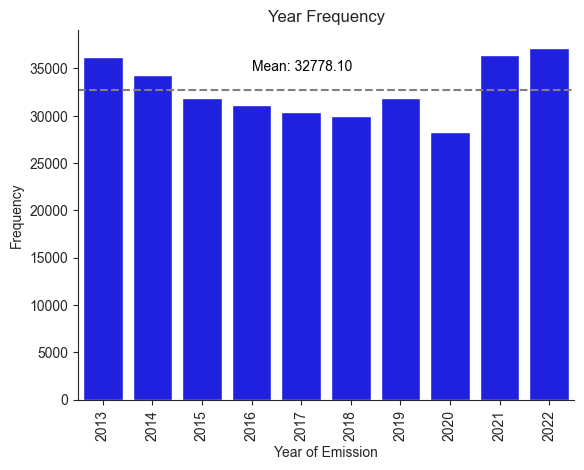

In [372]:
def year_frequency_plot(df, column_name):
    # Set the theme
    sns.set_style("ticks")

    # Calculate the year frequency
    year_frequency = df[column_name].value_counts().sort_index()
    year_frequency.index = year_frequency.index.astype(int)
    # Create a bar plot
    sns.barplot(x=year_frequency.index, y=year_frequency.values, color='b')

    # Calculate the mean of the year frequency
    mean_year = year_frequency.mean()

    # Add a horizontal line for the mean
    plt.axhline(mean_year, color='grey', linestyle='--')

    # Add a text label for the mean
    plt.text(3, mean_year + 2000, f'Mean: {mean_year:.2f}', color='black')

    # Improve the plot appearance
    plt.xlabel('Year of Emission')
    plt.ylabel('Frequency')
    plt.title('Year Frequency')
    plt.xticks(rotation=90)
    sns.despine()

    # Show the plot
    plt.show()


year_frequency_plot(df, 'ANO_EMISION')

Nota: Vemos que tenemos una cantidad considerable de datos para cada año. Todo bien.


De forma arbitraria podemos remover los valores nulos de las columnas que no impactan significativamente.


In [373]:
REMOVE_NULLS_OVER = [
    'TOTAL_HIJOS',
    'NUM_HIJ_HOM',
    'NUM_HIJ_MUJ',
    'VIC_ALFAB',
    'VIC_ESCOLARIDAD',
    'VIC_EST_CIV',
    'VIC_TRABAJA',
    'AGR_EST_CIV',
]
# Remove the rows with nulls in the specified columns
df = df.dropna(subset=REMOVE_NULLS_OVER)

In [374]:
df.shape

(326203, 52)

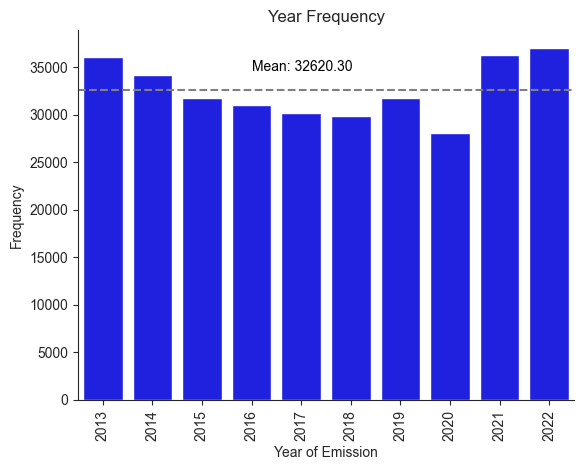

In [375]:
year_frequency_plot(df, 'ANO_EMISION')

In [376]:
df.isnull().sum()

ANO_EMISION                   0
MES_EMISION                   0
DIA_EMISION                   0
DEPTO_MCPIO                   0
QUIEN_REPORTA                 0
VIC_SEXO                      0
VIC_EDAD                      0
TOTAL_HIJOS                   0
NUM_HIJ_HOM                   0
NUM_HIJ_MUJ                   0
VIC_ALFAB                     0
VIC_ESCOLARIDAD               0
VIC_EST_CIV                   0
VIC_GRUPET                    0
VIC_NACIONAL                  0
VIC_TRABAJA                   0
VIC_OCUP                 216213
VIC_DEDICA               110354
VIC_DISC                      0
TIPO_DISCAQ              318926
VIC_REL_AGR                   0
OTRAS_VICTIMAS                0
VIC_OTRAS_HOM                 0
VIC_OTRAS_MUJ                 0
VIC_OTRAS_N_OS                0
VIC_OTRAS_N_AS                0
HEC_DIA                       0
HEC_MES                       0
HEC_ANO                     426
HEC_DEPTOMCPIO                0
HEC_AREA                      0
HEC_TIPA

In [377]:
# Remove columns

COLUMNS_TO_REMOVE = [
    'TIPO_DISCAQ',
    'INST_DONDE_DENUNCIO',
    'MEDIDAS_SEGURIDAD'
]


df = df.drop(columns=COLUMNS_TO_REMOVE)

In [378]:
missing_data_percentage = df.isnull().mean() * 100  # missing data percentage
missing_data_percentage

ANO_EMISION               0.000000
MES_EMISION               0.000000
DIA_EMISION               0.000000
DEPTO_MCPIO               0.000000
QUIEN_REPORTA             0.000000
VIC_SEXO                  0.000000
VIC_EDAD                  0.000000
TOTAL_HIJOS               0.000000
NUM_HIJ_HOM               0.000000
NUM_HIJ_MUJ               0.000000
VIC_ALFAB                 0.000000
VIC_ESCOLARIDAD           0.000000
VIC_EST_CIV               0.000000
VIC_GRUPET                0.000000
VIC_NACIONAL              0.000000
VIC_TRABAJA               0.000000
VIC_OCUP                 66.281733
VIC_DEDICA               33.829854
VIC_DISC                  0.000000
VIC_REL_AGR               0.000000
OTRAS_VICTIMAS            0.000000
VIC_OTRAS_HOM             0.000000
VIC_OTRAS_MUJ             0.000000
VIC_OTRAS_N_OS            0.000000
VIC_OTRAS_N_AS            0.000000
HEC_DIA                   0.000000
HEC_MES                   0.000000
HEC_ANO                   0.130594
HEC_DEPTOMCPIO      

In [379]:
# Joining two columns AGR_DEDICA and AGR_OCUP
# Create a new column with the joined values
# When some columns is missing the value is replaced by the other column
df['AGR_DEDICA'] = df['AGR_DEDICA'].fillna('') + df['AGR_OCUP'].fillna('')
df['VIC_DEDICA'] = df['VIC_DEDICA'].fillna('') + df['VIC_OCUP'].fillna('')

# Drop the original columns
df = df.drop(columns=['AGR_OCUP', 'VIC_OCUP'])

In [380]:
missing_data_percentage = df.isnull().mean() * 100  # missing data percentage
missing_data_percentage

ANO_EMISION               0.000000
MES_EMISION               0.000000
DIA_EMISION               0.000000
DEPTO_MCPIO               0.000000
QUIEN_REPORTA             0.000000
VIC_SEXO                  0.000000
VIC_EDAD                  0.000000
TOTAL_HIJOS               0.000000
NUM_HIJ_HOM               0.000000
NUM_HIJ_MUJ               0.000000
VIC_ALFAB                 0.000000
VIC_ESCOLARIDAD           0.000000
VIC_EST_CIV               0.000000
VIC_GRUPET                0.000000
VIC_NACIONAL              0.000000
VIC_TRABAJA               0.000000
VIC_DEDICA                0.000000
VIC_DISC                  0.000000
VIC_REL_AGR               0.000000
OTRAS_VICTIMAS            0.000000
VIC_OTRAS_HOM             0.000000
VIC_OTRAS_MUJ             0.000000
VIC_OTRAS_N_OS            0.000000
VIC_OTRAS_N_AS            0.000000
HEC_DIA                   0.000000
HEC_MES                   0.000000
HEC_ANO                   0.130594
HEC_DEPTOMCPIO            0.000000
HEC_AREA            

In [381]:
df.shape

(326203, 47)

In [382]:
# Remove any VIC_DEDICA and AGR_DEDICA with length 0 after stripping
df = df[df['VIC_DEDICA'].str.strip().astype(bool)]
df = df[df['AGR_DEDICA'].str.strip().astype(bool)]

In [383]:
missing_data_percentage = df.isnull().mean() * 100  # missing data percentage
missing_data_percentage

ANO_EMISION               0.000000
MES_EMISION               0.000000
DIA_EMISION               0.000000
DEPTO_MCPIO               0.000000
QUIEN_REPORTA             0.000000
VIC_SEXO                  0.000000
VIC_EDAD                  0.000000
TOTAL_HIJOS               0.000000
NUM_HIJ_HOM               0.000000
NUM_HIJ_MUJ               0.000000
VIC_ALFAB                 0.000000
VIC_ESCOLARIDAD           0.000000
VIC_EST_CIV               0.000000
VIC_GRUPET                0.000000
VIC_NACIONAL              0.000000
VIC_TRABAJA               0.000000
VIC_DEDICA                0.000000
VIC_DISC                  0.000000
VIC_REL_AGR               0.000000
OTRAS_VICTIMAS            0.000000
VIC_OTRAS_HOM             0.000000
VIC_OTRAS_MUJ             0.000000
VIC_OTRAS_N_OS            0.000000
VIC_OTRAS_N_AS            0.000000
HEC_DIA                   0.000000
HEC_MES                   0.000000
HEC_ANO                   0.115705
HEC_DEPTOMCPIO            0.000000
HEC_AREA            

In [384]:
df.shape

(319778, 47)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319778 entries, 0 to 327780
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO_EMISION            319778 non-null  float64
 1   MES_EMISION            319778 non-null  object 
 2   DIA_EMISION            319778 non-null  float64
 3   DEPTO_MCPIO            319778 non-null  object 
 4   QUIEN_REPORTA          319778 non-null  object 
 5   VIC_SEXO               319778 non-null  object 
 6   VIC_EDAD               319778 non-null  float64
 7   TOTAL_HIJOS            319778 non-null  object 
 8   NUM_HIJ_HOM            319778 non-null  object 
 9   NUM_HIJ_MUJ            319778 non-null  object 
 10  VIC_ALFAB              319778 non-null  object 
 11  VIC_ESCOLARIDAD        319778 non-null  float64
 12  VIC_EST_CIV            319778 non-null  object 
 13  VIC_GRUPET             319778 non-null  object 
 14  VIC_NACIONAL           319778 non-null  o

In [386]:
# Save the cleaned data
df.to_csv('data/gen/cleaned.csv', index=False)